## Import necessary modules

This code is written in Python 2.7 using the following python modules that can be installed via pip or conda:
- pandas 0.24.1
- numpy 1.16.2
- matplotlib 2.2.3
- cartopy 0.17.0
- shapely 1.6.4

The full computational environment associated with these modules can be found within the suture_analysis.yml file in this repository. In addition, the code imports and uses custom python functions that are included within this repository as recon_tools.py. The implementation of this analysis relies heavily on functions within pygplates http://www.gplates.org/docs/pygplates/index.html. The pygplates code is compatible with Python 2, which is why this code is in Python 2 rather than 3.

In [2]:
import pygplates
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as patches
import cartopy
import cartopy.crs as ccrs
from shapely.geometry.polygon import Polygon

from recon_tools import *

%matplotlib inline
%config InlineBackend.figure_format = 'png'

## Read In Files

The following code imports the following files:
- CEED_blocks : continental polygon blocks from the CEED6 model used in Torsvik and Cocks, (2017) with the addition of the Domeier (2018) Kazakh polygons
- Matthews_blocks : continental polygon blocks from the Matthews et al. (2016) model
- TC17_SHM17_D18_model : modified Torsvik and Cocks (2017) model that is modified by: 1) implementing the Swanson-Hysell and Macdonald (2017) Ordovician modification for Laurentia based on high-quality paleomagnetic data from allochthonous terranes and 2) adjustments of the early Paleozoic paleogeography of Asia made by Domeier (2018). These adjustments include the addition of ‘North Tianshan’ and ‘Boshekul-Chingiz’ zone rotation parameters so that sutures in the Kazakh terranes can be reconstructed as well as adjustments for North China, South China, Siberia and Tarim.
- M2016_model : rotation file for the Matthews et al. (2016) model (0 to 250 Ma)

In [3]:
CEED_blocks = pygplates.FeatureCollection.read('paleogeo_models/CEED6+Kazakh/CEED6+D18_Kazakh.shp')
CEED_land = pygplates.FeatureCollection.read('paleogeo_models/CEED6/CEED6_LAND.shp')
Matthews_blocks = pygplates.FeatureCollection.read('paleogeo_models/Matthews_etal_2016_Global_Plate_Model_GPC/ContPolys/PresentDay_ContinentalPolygons_Matthews++.shp')

TC17_SHM17_D18_model = 'paleogeo_models/TC2017_SHM2017_D2018.rot'
M2016_model = 'paleogeo_models/Matthews_etal_2016_Global_Plate_Model_GPC/Global_EB_250-0Ma_GK07_Matthews++.rot'

Self-intersection at or near point -16701897.299166379 -2127604.4999960819
Self-intersection at or near point -1696651.331387003 -2249397.3069995143
Self-intersection at or near point -1606568.9407816574 -7414597.2188754687


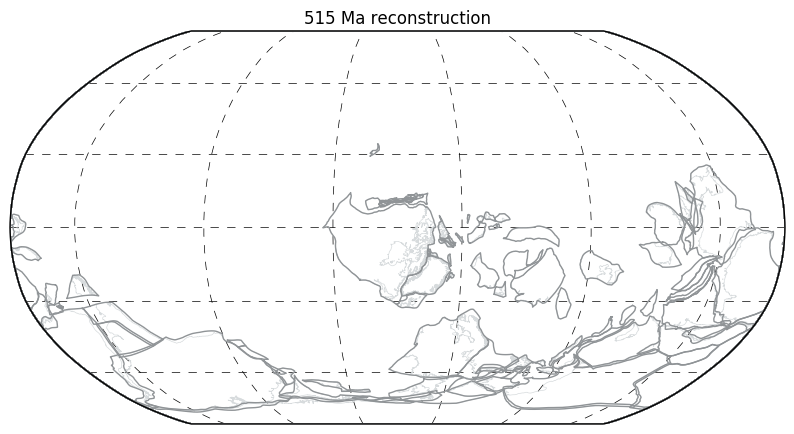

Self-intersection at or near point -1759104.3194446301 -2578047.6507333829
Self-intersection at or near point -1165162.0525287678 -7904127.3351144921


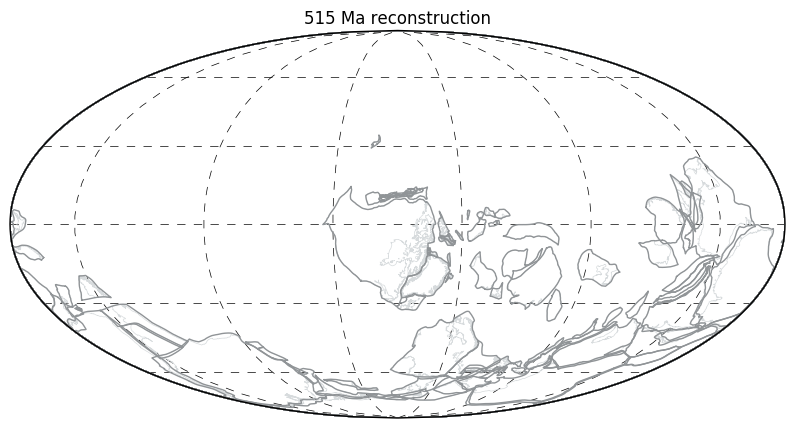

Self-intersection at or near point -1870619.8782792948 -2289284.7209876589
Self-intersection at or near point -823229.61827621318 -6051285.8125808695


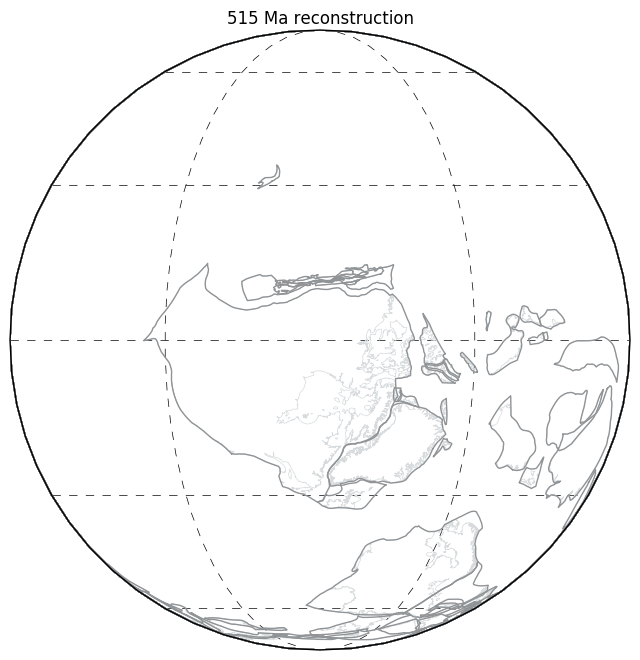

In [4]:
t = 515     #reconstruction time
anchor = 1  #anchor plate ID (1 : spin axis)

CEED_blocks_515 = []
pygplates.reconstruct(CEED_blocks, TC17_SHM17_D18_model, CEED_blocks_515, t, anchor)

CEED_land_515 = []
pygplates.reconstruct(CEED_land, TC17_SHM17_D18_model, CEED_land_515, t, anchor)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=210)))
ax.set_global()
ax.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')

plot_reconstructed_feature(ax,CEED_land_515,color='#D7DBDD',linewidth=0.5)
plot_reconstructed_feature(ax,CEED_blocks_515,color='#909497')

plt.title(str(t) + ' Ma reconstruction')

plt.savefig('code_output/515Ma_reconstruction_Robinson.svg')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.Mollweide(central_longitude=210)))
ax.set_global()
ax.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')

plot_reconstructed_feature(ax,CEED_land_515,color='#D7DBDD',linewidth=0.5)
plot_reconstructed_feature(ax,CEED_blocks_515,color='#909497')

plt.title(str(t) + ' Ma reconstruction')

plt.savefig('code_output/515Ma_reconstruction_Mollweide.svg')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.Orthographic(central_longitude=210)))
ax.set_global()
ax.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')

plot_reconstructed_feature(ax,CEED_land_515,color='#D7DBDD',linewidth=0.5)
plot_reconstructed_feature(ax,CEED_blocks_515,color='#909497')

plt.title(str(t) + ' Ma reconstruction')

plt.savefig('code_output/515Ma_reconstruction_Orthographic.svg')
plt.show()

Self-intersection at or near point -2846283.2357501984 -2186798.4837245834
Self-intersection at or near point -4909687.1777296662 -6417907.7895507105
Self-intersection at or near point 2901020.0907100146 -8312698.7971363114


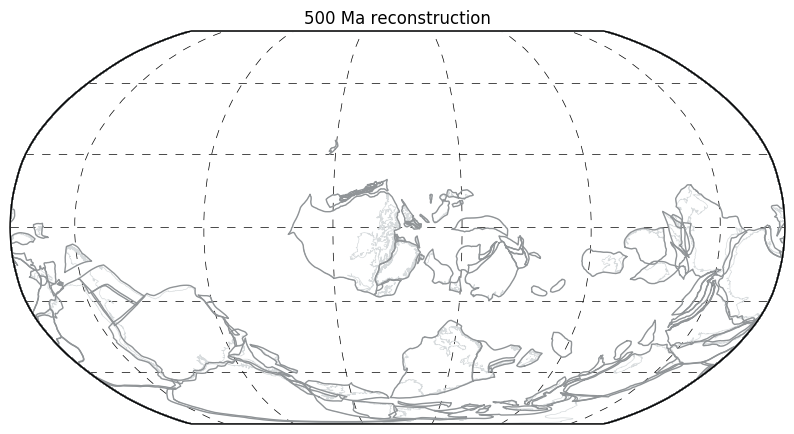

Self-intersection at or near point -2955138.1299396465 -2507520.2787437486
Self-intersection at or near point -4184474.8641269947 -6956706.5346328532
Self-intersection at or near point 1329235.9175148529 -8722448.164652003


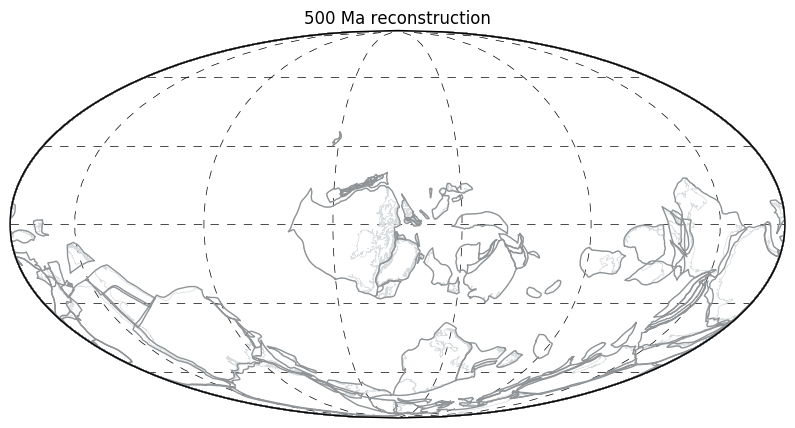

Self-intersection at or near point -3050269.0386314751 -2228500.3320354843
Self-intersection at or near point -2838062.1112480266 -5566203.3144735647
Self-intersection at or near point -4119668.1436232263 -4783942.1464969777


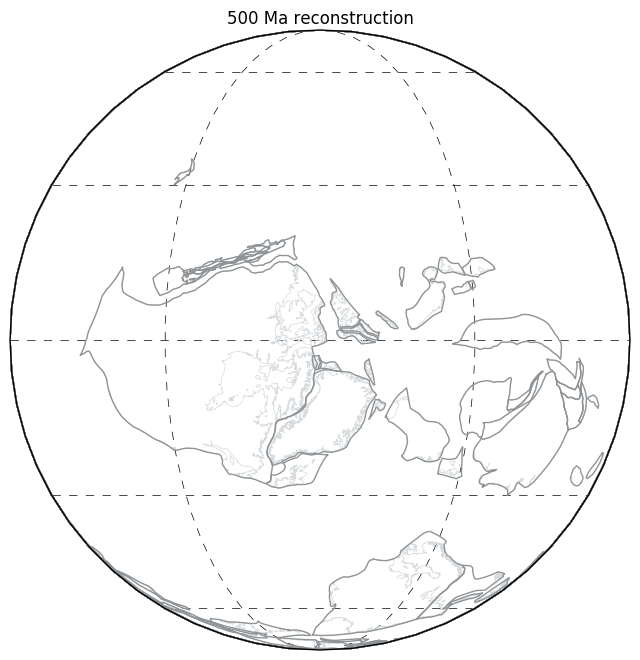

In [5]:
t = 500     #reconstruction time
anchor = 1  #anchor plate ID (1 : spin axis)

CEED_blocks_500 = []
pygplates.reconstruct(CEED_blocks, TC17_SHM17_D18_model, CEED_blocks_500, t, anchor)

CEED_land_500 = []
pygplates.reconstruct(CEED_land, TC17_SHM17_D18_model, CEED_land_500, t, anchor)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=210)))
ax.set_global()
ax.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')

plot_reconstructed_feature(ax,CEED_land_500,color='#D7DBDD',linewidth=0.5)
plot_reconstructed_feature(ax,CEED_blocks_500,color='#909497')

plt.title(str(t) + ' Ma reconstruction')

plt.savefig('code_output/500Ma_reconstruction_Robinson.svg')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.Mollweide(central_longitude=210)))
ax.set_global()
ax.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')

plot_reconstructed_feature(ax,CEED_land_500,color='#D7DBDD',linewidth=0.5)
plot_reconstructed_feature(ax,CEED_blocks_500,color='#909497')

plt.title(str(t) + ' Ma reconstruction')

plt.savefig('code_output/500Ma_reconstruction_Mollweide.svg')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.Orthographic(central_longitude=210)))
ax.set_global()
ax.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')

plot_reconstructed_feature(ax,CEED_land_500,color='#D7DBDD',linewidth=0.5)
plot_reconstructed_feature(ax,CEED_blocks_500,color='#909497')

plt.title(str(t) + ' Ma reconstruction')

plt.savefig('code_output/500Ma_reconstruction_Orthographic.svg')
plt.show()

Self-intersection at or near point 428370.67482330411 -12650409.360115109
Self-intersection at or near point 417286.48181503516 -12650765.879007967
Self-intersection at or near point -3211911.6400670176 -2330326.5259360895
Self-intersection at or near point -3664169.0132631501 -7160414.0182090048
Self-intersection at or near point 435122.73092841159 -12650164.929792119
Self-intersection at or near point -439055.30735431204 -12608756.616864987


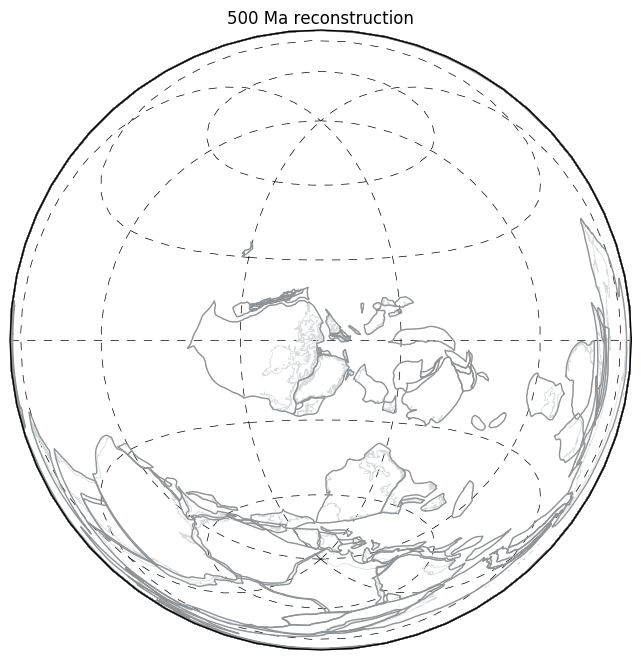

In [6]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.LambertAzimuthalEqualArea(central_longitude=210)))
ax.set_global()
ax.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')

plot_reconstructed_feature(ax,CEED_land_500,color='#D7DBDD',linewidth=0.5)
plot_reconstructed_feature(ax,CEED_blocks_500,color='#909497')

plt.title(str(t) + ' Ma reconstruction')